# t-distributed Stochastic Network Embedding (t-SNE)
### Dataset: [A3-data.txt](../../input/A3-data.txt)

<a id="1"></a>
## Import modules

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<a id="2"></a>
## Loading dataset

In [2]:
filename = '../../input/A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]


<a id="3"></a>
## Standardize the data

In [3]:
features = ['x', 'y', 'z', 't']
target = ['class']

x = df.loc[:, features].values

y = df.loc[:, target].values

x = StandardScaler().fit_transform(x)

<a id="4"></a>
## t-SNE Projection to 2D

In [4]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1)
tsne_result = tsne.fit_transform(x)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

print("original shape:   ", x.shape)
print("transformed shape:", tsne_result.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 360 samples in 0.002s...
[t-SNE] Computed neighbors for 360 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 360 / 360
[t-SNE] Mean sigma: 0.692581
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.343945
[t-SNE] KL divergence after 1000 iterations: 0.481037
t-SNE done! Time elapsed: 1.8569269180297852 seconds
original shape:    (360, 4)
transformed shape: (360, 2)


<a id="5"></a>
## Visualize 2D Projection

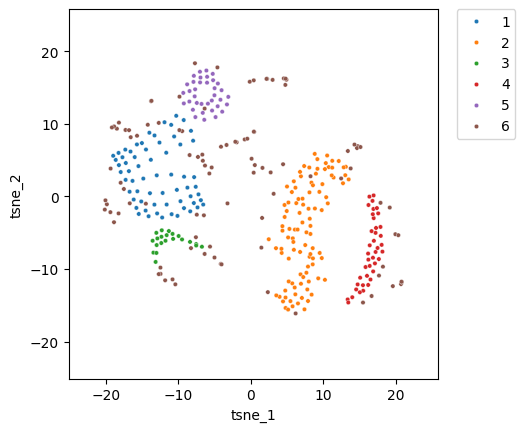

In [5]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'class': y[:,0]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='class', data=tsne_result_df, ax=ax,s=10, palette=sns.color_palette(n_colors=6))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()